In [45]:
from matplotlib import pyplot as plt
from tqdm import tqdm

from gym_env_market.BertrandEnv import *
from agents import *

# hyperparameters

In [46]:
# env
n_firms = 2
m=15
mu=0.25
a=1
a0=0
c=1
xi=0.1

# Agents
epsilon_start=1.0
epsilon_decay=0.999995
epsilon_min=0.0
gamma=0.95
alpha=0.1

n_episodes=100000

# Initialize env

In [47]:
env = BertrandEnv(
    n_firms=n_firms,
    m=m,
    mu=mu,
    a=a,
    a0=a0,
    c=c,
    xi=xi
)

# Initialize agents

In [48]:
agent1 = QLearningAgent(env.action_space.n,
                        env.action_space.n,
                        gamma=gamma,
                        alpha=alpha,
                        epsilon_decay=epsilon_decay,
                        epsilon_min=epsilon_min,
                        epsilon_start= epsilon_start
                        )
agent2 = QLearningAgent(env.action_space.n,
                        env.action_space.n,
                        gamma=gamma,
                        alpha=alpha,
                        epsilon_decay=epsilon_decay,
                        epsilon_min=epsilon_min,
                        epsilon_start= epsilon_start
                        )

In [49]:
print(agent1.q_table)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


# training

In [50]:
prices_1 = []
prices_2 = []


for episode in tqdm(range(n_episodes), desc="Training"):
    state = env.reset()
    done = False


    i = 0
    while not done:
        # Sélection des actions
        action1 = agent1.choose_action(state[0])
        action2 = agent2.choose_action(state[1])

        # Interaction avec l'environnement
        next_state, rewards, done, _ = env.step([action1, action2])

        # Mise à jour des Q-tables
        agent1.update(state[0], action1, rewards[0], next_state[0])
        agent2.update(state[1], action2, rewards[1], next_state[1])

        state = next_state

        i += 1
        if i > 500:
            break

    # Décroissance de l'exploration après chaque épisode
    agent1.decay_epsilon()
    agent2.decay_epsilon()

Training: 100%|██████████| 100000/100000 [12:41<00:00, 131.29it/s]


# Test

In [66]:
agent1.epsilon = 0.
agent2.epsilon = 0.

In [67]:
rewards_list = []
prices_list = []

state = env.reset()
done = False

i = 0
while not done:
        # Sélection des actions
        action1 = agent1.choose_action(state[0])
        action2 = agent2.choose_action(state[1])

        # Interaction avec l'environnement
        next_state, rewards, done, _ = env.step([action1, action2])

        rewards_list.append(rewards)

        # Mise à jour des Q-tables
        agent1.update(state[0], action1, rewards[0], next_state[0])
        agent2.update(state[1], action2, rewards[1], next_state[1])

        state = next_state

        prices_list.append(env.prices)

        i += 1
        if i > 20:
            break

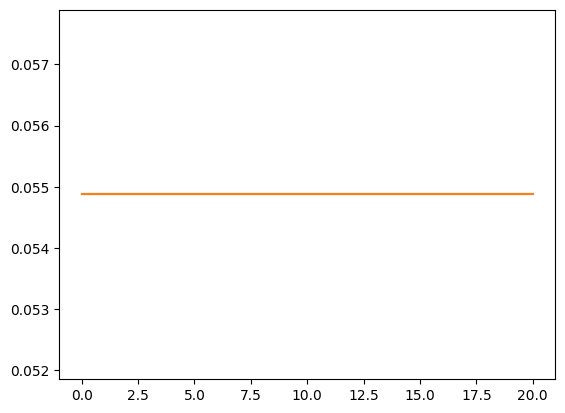

In [68]:
plt.plot(rewards_list)
plt.show()

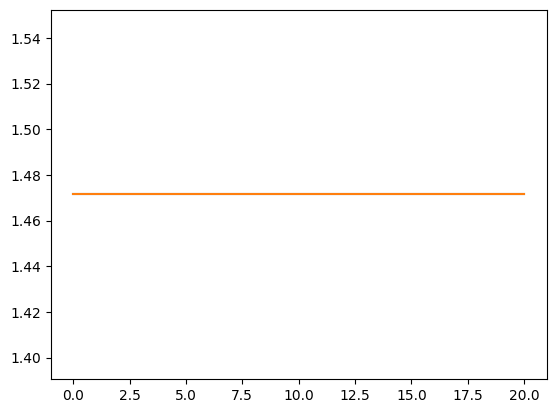

In [69]:
plt.plot(prices_list)
plt.show()